<a href="https://colab.research.google.com/github/davidgiraldo30/environment_2/blob/main/workshop2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning II
# Clustering

#### David Alejandro Giraldo Montoya
#### CC 1020451546

# Workshop I

## 1. Research about the Spectral Clustering method, and answer the following questions:

El spectral clustering es una técnica basada en teoría de grafos, donde el enfoque se usa para identificar comunidades de nodos en un grafo basado en las conexiones que tiene. El método es flexible y permite también hacer clustering a datos no basados en grafos.

a. In which cases might it be more useful to apply?

En casos en que la distancia euclidiana no es la mejor forma de generar clústers. Por ejemplo en K-means se puede asumir que hay clusters a lado y lado de una imagen con dos nubes de puntos en forma de círculo, una dentro de la otra. Con spectral clustering puede identificarse que hay dos patrones, uno para la esfera interior y otra para la exterior, mientras k-means partiría en dos ambas esferas. De forma más general, el clustering espectral es útil cuando los datos tienen forma arbitraria, es decir cuando los datos no se encuentran distribuidos uniformemente en el espacio.

b. What are the mathematical fundamentals of it?

Spectral clustering parte de matrices construidas del dataset y de ellas se obtienen los eigenvalores. Con los eigenvectores se asignan los datos a cada cluster.

En el proceso se calculan la matriz de proximidad o de adyacencia (adjacency matrix, cuántos nodos son vecinos con cada dato), la matriz de grado (degree matrix, con cuántos nodos tiene conexión). Se calcula la gráfica laplaciana restando D-A, es decir la matriz de adyacencia de la matriz de grado.

Se calculan los eigenvalores de esta matriz laplaciana y el primer eigenvalor diferente de 0 es el gap espectral, que da noción de la densidad del grafo. El gap espectral entrega cuántos nodos están unidos en la matriz laplaciana. En cuanto más eigenvalores hay antes del gap espectral, más posibilidad de haber ese número de clústers.

Los vectores asociados a los eigenvalores calculados que están antes del gap espectral son usados para aplicarles K-Means para encontrar las etiquetas de los nodos.

Fuente: https://towardsdatascience.com/spectral-clustering-aba2640c0d5b

c. What is the algorithm to compute it?

In [1]:
from sklearn.cluster import SpectralClustering

In [2]:
from sklearn.datasets import make_blobs


In [3]:
import matplotlib.pyplot as plt
from numpy import random

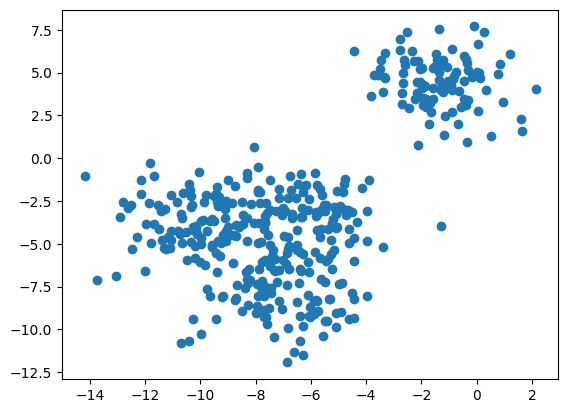

SpectralClustering(n_clusters=4)


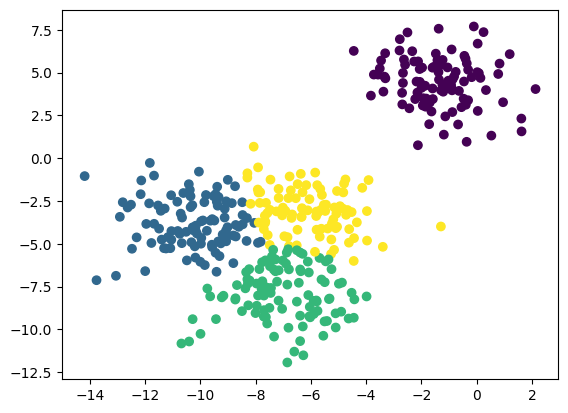

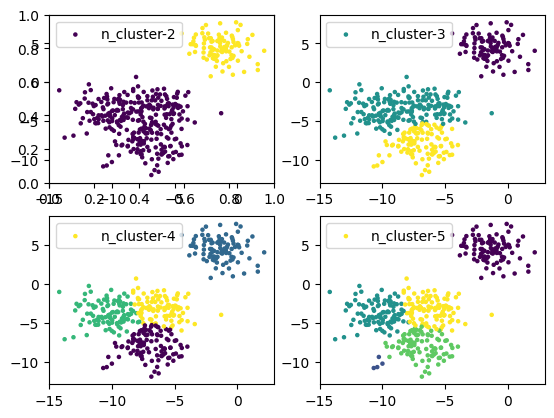

In [4]:


random.seed(1)
x, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.5)
plt.scatter(x[:,0], x[:,1])
plt.show()

sc = SpectralClustering(n_clusters=4).fit(x)
print(sc)
 
labels = sc.labels_
plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()

f = plt.figure()
f.add_subplot(2, 2, 1)
for i in range(2, 6):
 sc = SpectralClustering(n_clusters=i).fit(x)
 f.add_subplot(2, 2, i-1)
 plt.scatter(x[:,0], x[:,1], s=5, c=sc.labels_, label="n_cluster-"+str(i))
 plt.legend()

plt.show() 

## 2. Research about the DBSCAN method, and answer the following questions:

a. In which cases might it be more useful to apply?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un método de clustering que en cuentra muestras de alta intensidad y expande los clústers alrededor de ellos. Puede ser útil en los siguientes casos:

1. Para identificar clústers en data de alta dimensionalidad, donde otros métodos basados en la distancia pueden tener problemas.

2. Datos con forma irregular; puede identificar clusters de formas arbitrarias por lo que es útil si los datos no ajustan a formas bien definidas.

3. Identificando outliers: El algoritmo puede identificar puntos que no pertenecen a ningún clúster, haciéndolo útil para detección de datos atípicos.

4. Para identificar regiones con alta intensidad, por lo que puede ser útil para encontrar áreas de interés.

Métodos de clústering como K-Means y Clústering jerárquico no son buenos para agrupar datos con formas irregulares, por lo que una buena alternativa para esto es DBSCAN, que como su nombre indica es robusto frente a datos atípicos.

b. What are the mathematical fundamentals of it?


El principal supuesto de DBSCAN es que los clusters son áreas de alta densidad separadas por regiones con ruido o baja densidad en los datos. El algoritmo recibe dos parámetros: Epsilon y minPoints. Epsilon es el radio del círculo en donde el algoritmo va a evaluar densidad para cada punto, mientras minPoint es el mínimo de puntos que debe haber en cada círculo para ser catalogado como un área de alta densidad. Esto en dos dimensiones, pero es replicable en alta dimensionalidad.

Si en el círculo de radio epsilon alrededor de cada punto hay al menos minPoints puntos, se trata de un punto central de alta densidad. Si hay menos puntos que minPoints, se trata de un punto-borde, mientras que si no hay otros datos, es tratado como ruido.

https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/


c. Is there any relation between DBSCAN and Spectral Clustering? If so, what is it?

Ambos métodos de clústering se fundamentan en encontrar vecindades de puntos con alta densidad. En spectral clustering se calculan matriz de proximidad y matriz de grado, proceso que podría ser de cierta forma similar a DBSCAN donde se calcula la densidad de cada cluster contando el número de puntos dentro del radio de cada esfera. Así las cosas, en spectral clustering y DBSCAN se trabaja con la densidad y distancia entre los datos. 

Sin embargo, el clustering espectral es más flexible puesto que en DBSCAN hay definiciones más estrictas en cuanto a lo que es un punto de alta densidad (viene definido por el epsilon y el número de minPoints)

## 3. What is the elbow method in clustering? And which flaws does it pose to assess quality?

Es un método para definir el número de clusters en un algoritmo de clustering. Mide la varianza dentro de cada cluster con la suma de los cuadrados dentro de cada uno. El proceso consiste en correr varias veces el algoritmo de clustering con diferentes parámetros en el número de grupos a diferenciar. Al graficar la suma de los cuadrados de los clusters frente al número de clusters, debe entregar una gráfica con pendiente descendente a medida que el número de clusters incrementa, puesto que es de suponer que a mayor número de clusters, mayor ajuste a los datos. Sin embargo, a medida que se aumenta el número de clústers, la pendiente descendente comienza a disminuir al punto de generar un "codo". Este sería el punto en que se optimiza el ajuste con la complejidad del modelo.

Una carencia del método es que confía plenamente en el método de la suma de los cuadrados (WCSS), y dos bases de datos podrían tener el mismo WCSS a pesar de no tener la misma densidad en los clusters.

También falla cuando hay buena cantidad de ruido.

## 4. Remember the unsupervised Python package from unsupervised machine learning workshop2? It’s time for an upgrade

a. Implement the k-means module using Python and Numpy

b. Implement the k-medoids module using Python and Numpy

c. Remember to keep consistency with Scikit-Learn API as high as possible

 La implementación de este punto se puede encontrar en este apartado del paquete: 

modules/unsupervised_learning.py

## 5. Let’s use the newly created modules in unsupervised to cluster some toy data.

a. Use the following code snippet to create scattered data X



In [5]:
from sklearn.datasets import make_blobs
import numpy as np

X, y = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,
)

X.shape, y.shape

((500, 2), (500,))

b. Plot the resulting dataset. How many clusters are there? How far are they from one another?

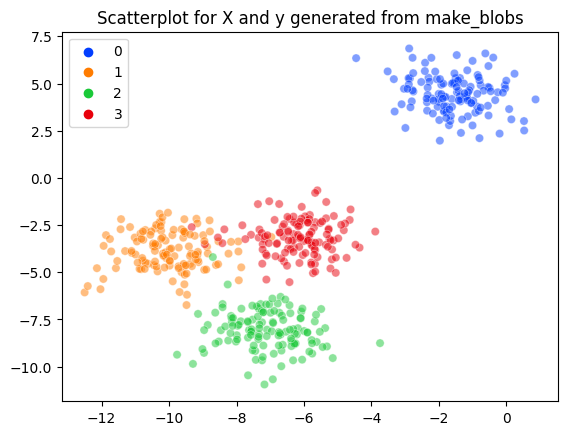

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('Scatterplot for X and y generated from make_blobs')
sns.scatterplot(x=X[:,0], y = X[:,1], hue = y, alpha = 0.5, palette='bright')
plt.legend()
plt.show()

Aparentemente son 4 clusters, 3 de ellos más cerca entre sí mientras que el cuarto se encuentra más distanciado. También podría verse como una base de datos con dos clusters, donde uno de ellos son los 3 grupos de datos que componían los 3 clusters.

c. For both k-means and k-medoids (your implementations), calculate the silhouette plots and
coefficients for each run, iterating K from 1 to 5 clusters.

In [7]:
from modules.unsupervised_learning import silohuettes

# see lib/utils.py, plot_silohuettes can receive between KMeans and KMedoids as parameters, and will use the implementation from scratch from both 
# that are located in lib.utils, and will plot the silohuette plot for a given range of clusters to iterate

silohuettes(range_n_clusters=[2,3,4,5], X= X, method='KMeans')

ModuleNotFoundError: ignored

In [ ]:
silohuettes(range_n_clusters=[2,3,4,5], X= X, method='KMedoids')

d. What number of K got the best silhouette score? What can you say about the figures? Is this the
expected result?

Se puede observar que el mejor score de las siluetas se dio para 2 clusters, sin embargo el límite del promedio de score de la silueta es superado también por los 4 clusters, que aparentemente se ajusta mejor a la base de datos de acuerdo con el análisis visual.

## 6. Use the following code snippet to create different types of scattered data:

In [8]:
from sklearn import datasets
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None


# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

a. Plot the different datasets in separate figures. What can you say about them?

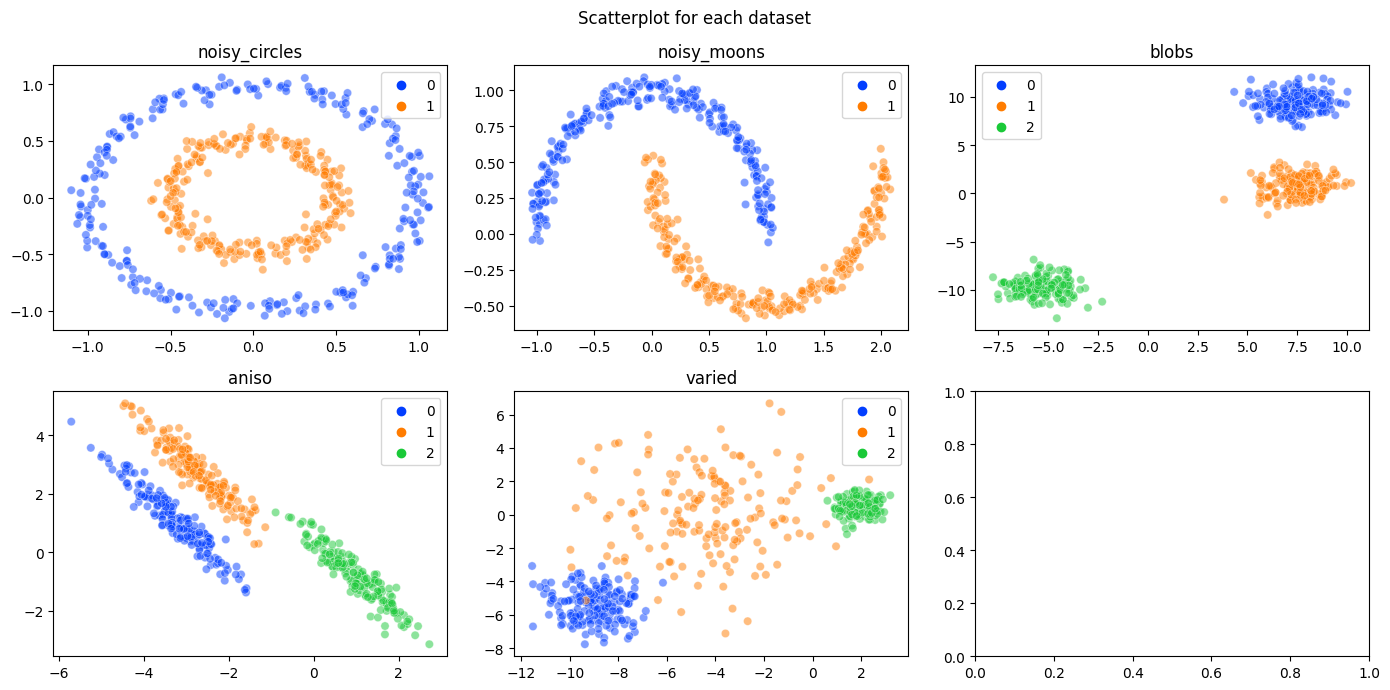

In [9]:
fig, axes = plt.subplots(2,3, figsize= (14,7))
datasets_names = ['noisy_circles', 'noisy_moons', 'blobs', 'aniso', 'varied']
datasets = [noisy_circles, noisy_moons, blobs, aniso, varied]
fig.suptitle('Scatterplot for each dataset')

i = 0
for row in range(2):
    for col in range(3):
        try:
            axes[row,col].set_title(datasets_names[i])
            sns.scatterplot(x = datasets[i][0][:,0], y = datasets[i][0][:,1], hue = datasets[i][1], alpha = 0.5, palette='bright', ax = axes[row,col])
            axes[row,col].legend()
            i += 1
        except:
            pass
    plt.tight_layout()
plt.show()

b. Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each
dataset and compare the results of each algorithm with respect to each dataset.

In [10]:
# let's transform our datasets to pandas dataframes, to make eaiser the way to store results from all clustering methods

import pandas as pd

[noisy_circles, noisy_moons, blobs, aniso, varied]

noisy_circles_df = pd.DataFrame(noisy_circles[0], columns=['x', 'y'])
noisy_circles_df['real_label'] = noisy_circles[1]

noisy_moons_df = pd.DataFrame(noisy_moons[0], columns=['x', 'y'])
noisy_moons_df['real_label'] = noisy_moons[1]

blobs_df = pd.DataFrame(blobs[0], columns=['x', 'y'])
blobs_df['real_label'] = blobs[1]

aniso_df = pd.DataFrame(aniso[0], columns=['x', 'y'])
aniso_df['real_label'] = aniso[1]

varied_df = pd.DataFrame(varied[0], columns=['x', 'y'])
varied_df['real_label'] = varied[1]

datasets_df = [noisy_circles_df, noisy_moons_df, blobs_df, aniso_df, varied_df]
datasets_df_names = ['noisy_circles_df', 'noisy_moons_df', 'blobs_df', 'aniso_df', 'varied_df']


In [11]:
from sklearn import cluster 
#from sklearn_extra import cluster as cluster2
import warnings
warnings.filterwarnings('ignore')

# Take the number of clusters defined in the nature of the dataset generation to 
n_clusters_datasets = [len(np.unique(dataset['real_label'])) for dataset in datasets_df]
clusterers = [cluster.KMeans, cluster.DBSCAN, cluster.SpectralClustering]


for dataset, n_clusters in zip(datasets_df, n_clusters_datasets):
    for clusterer in clusterers:
        if clusterer.__name__ in ['DBSCAN']:
            cluster_generator =  clusterer(eps = 0.15)
            dataset[str(cluster_generator).replace('(eps=0.15)','').lower()+'_label'] = cluster_generator.fit_predict(dataset[['x','y']])
        elif clusterer.__name__ in ['SpectralClustering']:
            cluster_generator =  clusterer(n_clusters = n_clusters,affinity="nearest_neighbors")            
            dataset[str(cluster_generator).replace("(affinity='nearest_neighbors', n_clusters="+str(n_clusters)+")","").lower()+"_label"] = cluster_generator.fit_predict(dataset[['x','y']])
        else:
            cluster_generator =  clusterer(n_clusters = n_clusters)
            dataset[str(cluster_generator).replace('(n_clusters='+str(n_clusters)+')','').lower()+'_label'] = cluster_generator.fit_predict(dataset[['x','y']])

# Let's see how the dataframes look afte the process
# for dataset, dataset_name in zip(datasets_df, datasets_df_names):
#     print(f"The dataset {dataset_name} has this columns: {dataset.columns.tolist()}")

In [12]:
noisy_circles_df.head()

,x,y,real_label,kmeans_label,dbscan_label,spectralclustering_label
0,-0.167436,0.420771,1,1,0,1
1,0.603043,-0.830657,0,1,1,0
2,0.666046,0.762894,0,1,1,0
3,-0.853087,-0.574223,0,0,1,0
4,0.964130,-0.237290,0,1,1,0


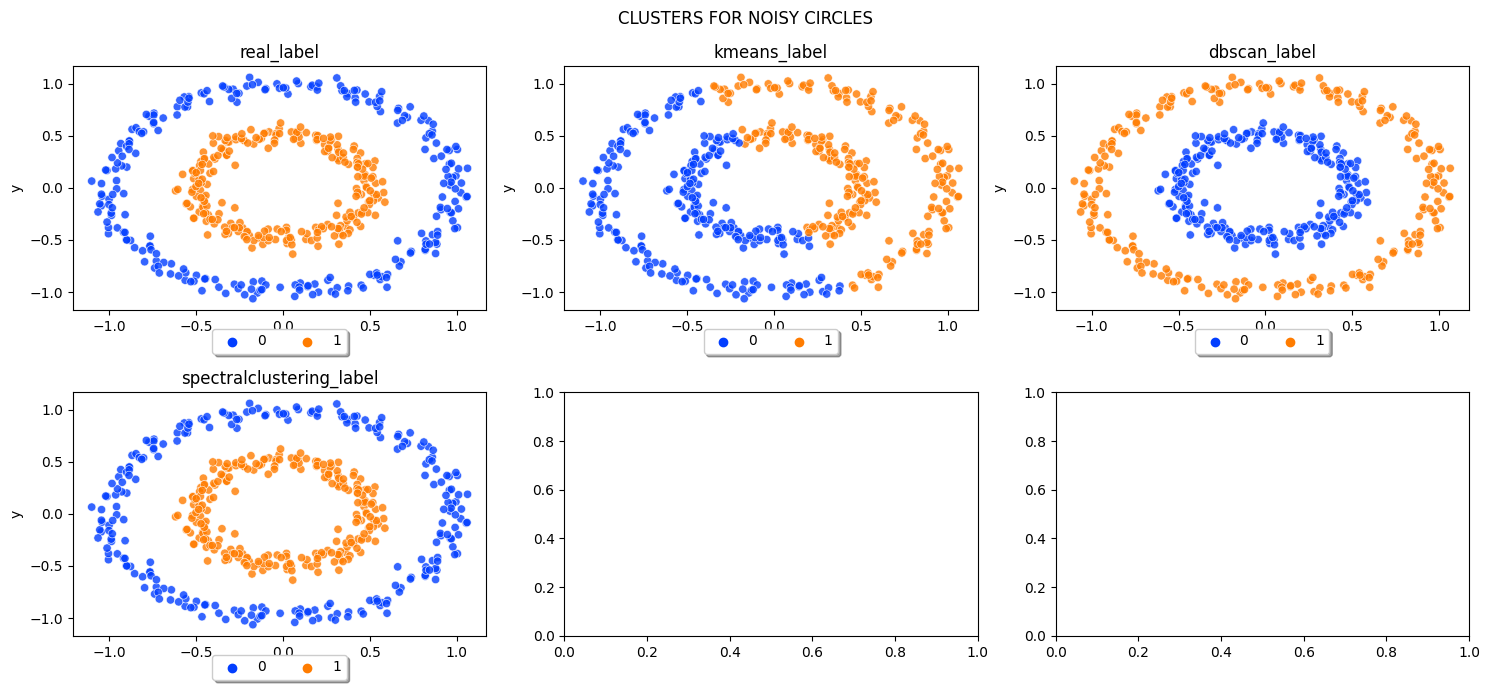

In [13]:
fig, axes = plt.subplots(2,3, figsize = (15,7))
fig.suptitle('Clusters for noisy circles'.upper())

cluster_labels = ['real_label', 'kmeans_label', 'dbscan_label', 'spectralclustering_label']
i = 0
for row in range(2):
    for col in range(3):
        try:
            axes[row, col].set_title(cluster_labels[i])
            sns.scatterplot(data = noisy_circles_df, x = 'x', y = 'y', hue = cluster_labels[i], alpha = 0.8, palette='bright', ax = axes[row, col])
            axes[row,col].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
            i += 1
        except:
            pass
    plt.tight_layout()
plt.show()

noisy moons df

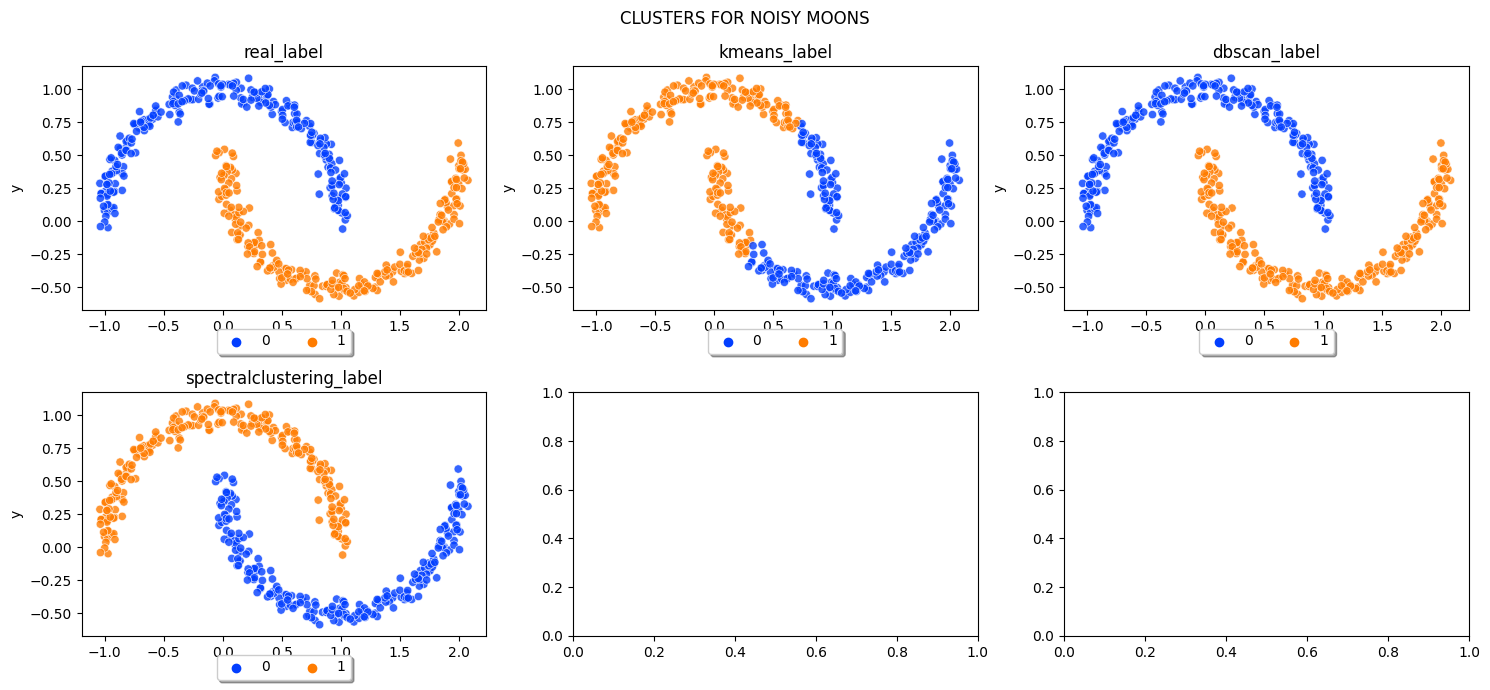

In [14]:
fig, axes = plt.subplots(2,3, figsize = (15,7))
fig.suptitle('Clusters for noisy moons'.upper())
cluster_labels = ['real_label', 'kmeans_label', 'dbscan_label', 'spectralclustering_label']
i = 0
for row in range(2):
    for col in range(3):
        try:
            axes[row, col].set_title(cluster_labels[i])
            sns.scatterplot(data = noisy_moons_df, x = 'x', y = 'y', hue = cluster_labels[i], alpha = 0.8, palette='bright', ax = axes[row, col])
            axes[row,col].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
            i += 1
        except:
            pass
    plt.tight_layout()
plt.show()

blobs df

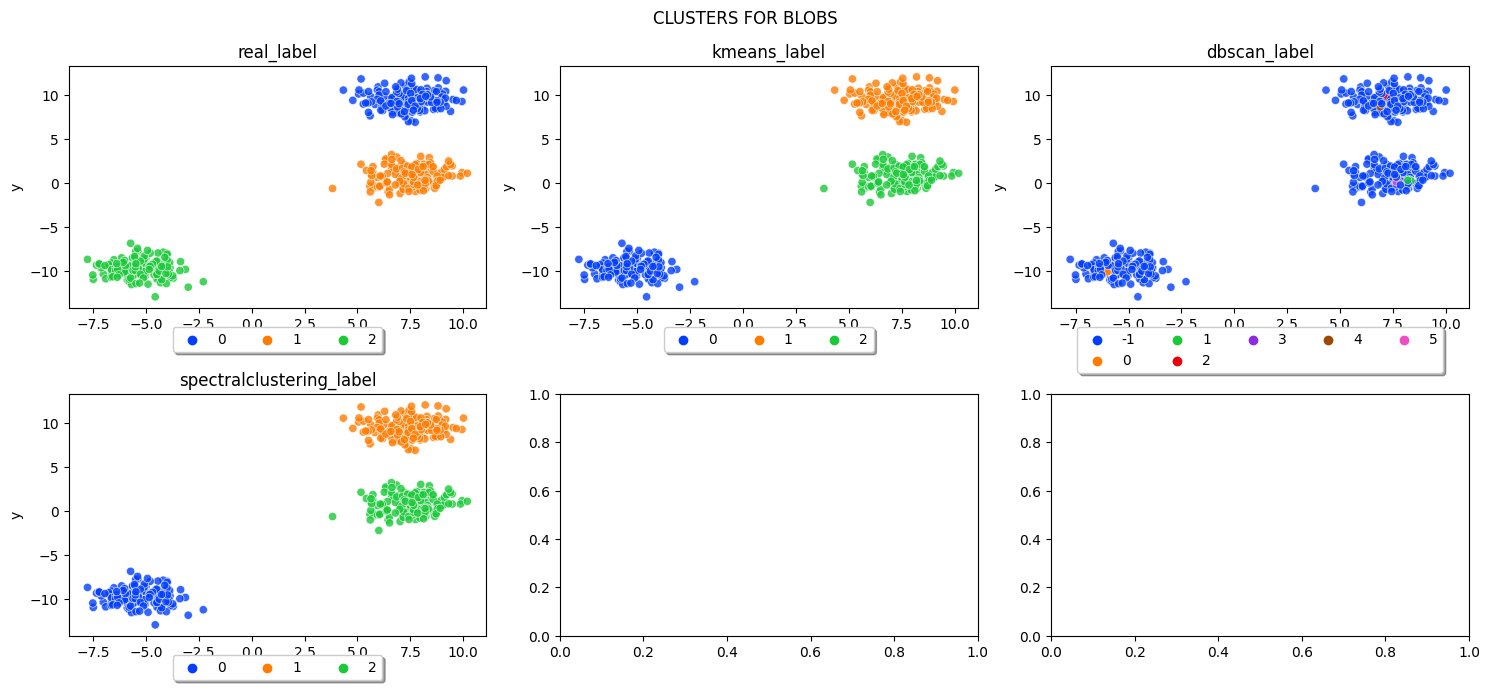

In [15]:
fig, axes = plt.subplots(2,3, figsize = (15,7))
fig.suptitle('Clusters for blobs'.upper())

cluster_labels = ['real_label', 'kmeans_label', 'dbscan_label', 'spectralclustering_label']
i = 0
for row in range(2):
    for col in range(3):
        try:
            axes[row, col].set_title(cluster_labels[i])
            sns.scatterplot(data = blobs_df, x = 'x', y = 'y', hue = cluster_labels[i], alpha = 0.8, palette='bright', ax = axes[row, col])
            axes[row,col].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
            i += 1
        except:
            pass
    plt.tight_layout()
plt.show()

aniso df

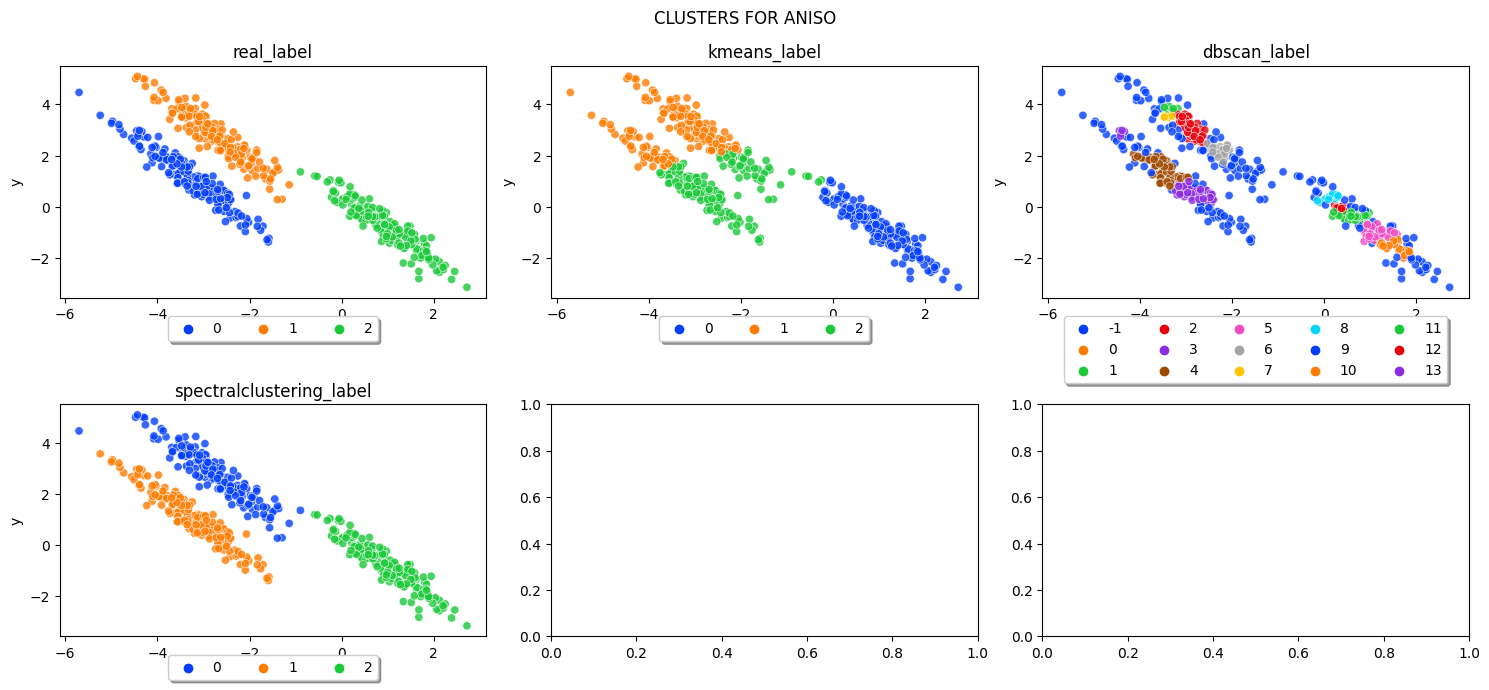

In [16]:
fig, axes = plt.subplots(2,3, figsize = (15,7))
fig.suptitle('Clusters for aniso'.upper())

cluster_labels = ['real_label', 'kmeans_label', 'dbscan_label', 'spectralclustering_label']
i = 0
for row in range(2):
    for col in range(3):
        try:
            axes[row, col].set_title(cluster_labels[i])
            sns.scatterplot(data = aniso_df, x = 'x', y = 'y', hue = cluster_labels[i], alpha = 0.8, palette='bright', ax = axes[row, col])
            axes[row,col].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
            i += 1
        except:
            pass
    plt.tight_layout()
plt.show()

noisy varied

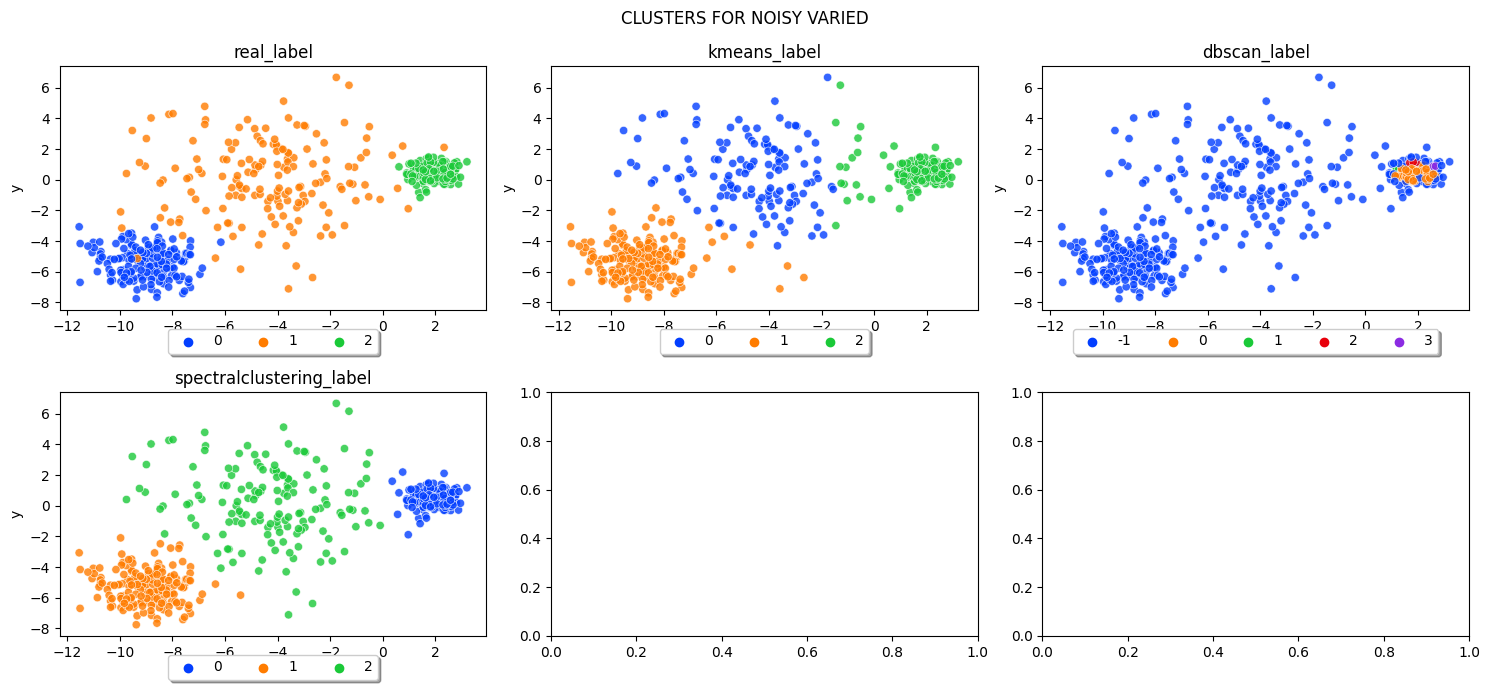

In [17]:
fig, axes = plt.subplots(2,3, figsize = (15,7))
fig.suptitle('Clusters for noisy varied'.upper())

cluster_labels = ['real_label', 'kmeans_label', 'dbscan_label', 'spectralclustering_label']
i = 0
for row in range(2):
    for col in range(3):
        try:
            axes[row, col].set_title(cluster_labels[i])
            sns.scatterplot(data = varied_df, x = 'x', y = 'y', hue = cluster_labels[i], alpha = 0.8, palette='bright', ax = axes[row, col])
            axes[row,col].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
            i += 1
        except:
            pass
    plt.tight_layout()
plt.show()